In [199]:
import pandas as pd
from aeon.visualisation import plot_critical_difference

In [ ]:
TARGET_LEN=192
KIND = "univariate"  # Change to "univariate" if needed
METRIC = "mse"  # Change to "mse" if needed

df = pd.read_json(f"results/{KIND}/{METRIC}.json")


datasets = df.columns.tolist()
contexts = df.index.tolist()

new_df = {}

for ctx_len in contexts:
    subdf = df.loc[ctx_len]
    for dataset in datasets:
        curr_ds = subdf[dataset]
        try:
            curr_ds = curr_ds[str(TARGET_LEN)]
            if dataset not in new_df:
                new_df[dataset] = {}
            for model, mse in curr_ds.items():
                model_name = model + "_" + str(ctx_len)
                new_df[dataset][model_name] = mse
        except:
            continue

df = pd.DataFrame(new_df)


In [201]:
model_names = df.index.str.extract(r'^(.*)_\d+$')[0].values.tolist()
df['model'] = model_names

# Step 2: Group by model and aggregate using first non-NaN per column
merged_df = df.groupby('model').agg(lambda col: col.dropna().iloc[0] if not col.dropna().empty else pd.NA)

# Optional: sort for readability
merged_df = merged_df.sort_index()

In [202]:
merged_df

,exchange_rate,etth2,ettm2,ettm1,weather,etth1
model,,,,,,
crossformer,0.546352,0.275665,0.178483,0.073395,0.001945,0.113658
itransformer,0.217116,0.336229,0.195088,0.075704,0.001611,0.130205
moment,0.475680,0.308189,0.169873,0.094188,0.001336,0.129491
patchtst,0.259566,0.295417,0.180124,0.072977,0.001257,0.110691
samformer,0.247494,0.299085,0.183293,0.072399,0.001349,0.112025
timemixer,0.220021,0.322345,0.195434,0.076901,0.001523,0.128258
vaformer,0.229111,0.310889,0.195372,0.098608,0.001680,0.135863


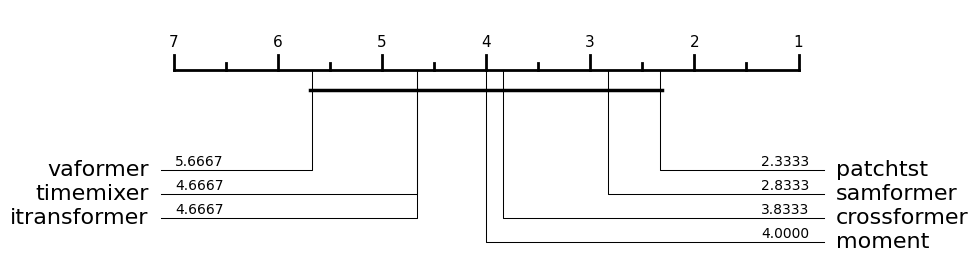

In [ ]:
results = merged_df.T
methods = results.columns
plot = plot_critical_difference(results.values, methods, alpha=0.05, width=8, test='nemenyi', lower_better=True)  
plt.title(f"Critical Difference Diagram for {KIND} MSE at Target Length {TARGET_LEN}")